In [65]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [66]:
pod = 'NA24'
# NA prime hours
primeLower = 11
primeUpper = 23
data_dir='/Users/abertran/Desktop/abertran/Documents/Data/CPUUtilRegModel/'
infile = data_dir+'2017-09-19-' + pod + '-dbCPU-1h.csv'
infra_infile=data_dir+'CPUUtil_Historical_Infra_' + pod + '.csv'


In [67]:
dateparse = lambda x: pd.to_datetime(x, unit='ms')
data = pd.read_csv(infile, index_col=0, parse_dates=['Timestamp'], date_parser=dateparse)
#data = data.reset_index()
#data.columns = ['ds','y']
data.head()

,db.WAS.SP4.na24:CPUUtil{source=OEM}
Timestamp,
2016-11-23 19:43:00,23.4286
2016-11-23 19:46:00,23.3758
2016-11-23 19:47:00,23.4286
2016-11-23 19:48:00,23.4510
2016-11-23 19:49:00,23.4734


In [68]:
# Filter prime hours to create new df
ts = data[(data.index.hour >= primeLower) & (data.index.hour <= primeUpper)]
ts.index.name = 'ds'
ts.columns = ['y']
ts = ts['y'].groupby(pd.TimeGrouper(freq='D')).max()
ts = ts.reset_index()
ts['ds'] = pd.to_datetime(ts['ds'])
ts.head()

,ds,y
0,2016-11-23,24.676600
1,2016-11-24,25.816766
2,2016-11-25,26.337001
3,2016-11-26,22.173900
4,2016-11-27,16.653801


In [69]:
#Read in aggregated historical data created by infra analytics


In [70]:
data_infra = pd.read_csv(infra_infile)
data_infra['date'] = pd.to_datetime(data_infra['date'])
data_infra.head()
data_infra.head()

,pod,date,cpu_util
0,NA24,2016-10-17,50.890566
1,NA24,2016-10-18,31.262599
2,NA24,2016-10-19,40.928967
3,NA24,2016-10-20,30.748733
4,NA24,2016-10-21,55.571067


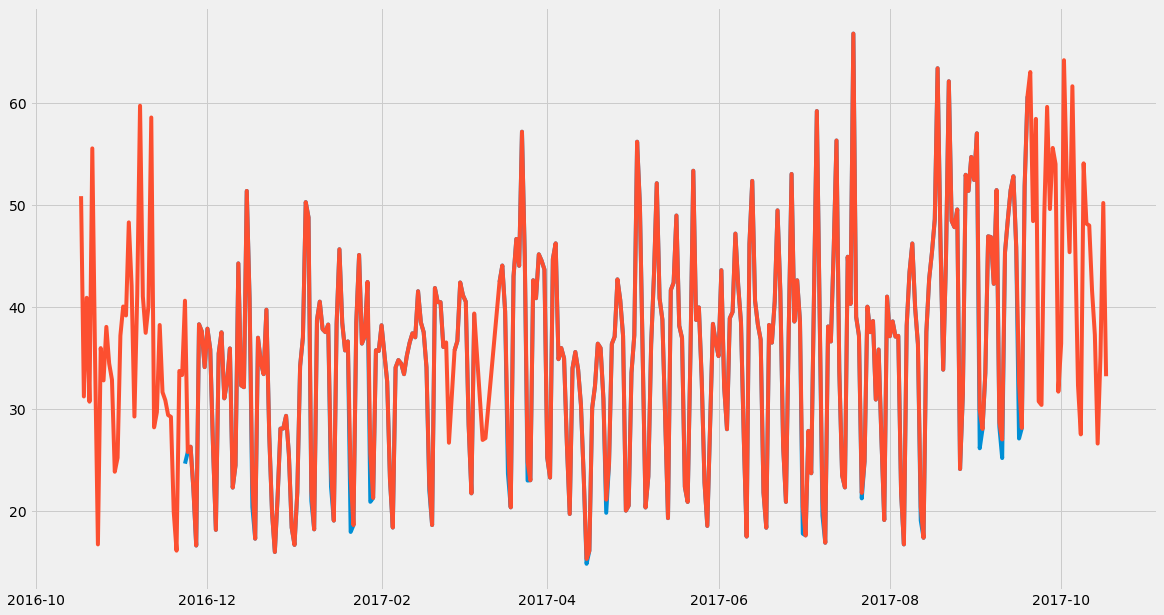

In [71]:
plt.figure(figsize=(18,10))
plt.plot(ts['ds'],ts['y'])
plt.plot(data_infra['date'],data_infra['cpu_util'])
plt.show()

In [75]:
data_infra.loc[38:47,]

,pod,date,cpu_util
38,NA24,2016-11-24,25.816766
39,NA24,2016-11-25,26.337001
40,NA24,2016-11-26,22.173900
41,NA24,2016-11-27,16.653801
42,NA24,2016-11-28,38.332467
43,NA24,2016-11-29,37.627699
44,NA24,2016-11-30,34.136133
45,NA24,2016-12-01,37.902300
46,NA24,2016-12-02,35.878601
47,NA24,2016-12-03,26.175800


In [73]:
ts.loc[1:10,]

,ds,y
1,2016-11-24,25.816766
2,2016-11-25,26.337001
3,2016-11-26,22.173900
4,2016-11-27,16.653801
5,2016-11-28,38.332467
6,2016-11-29,37.627699
7,2016-11-30,34.136133
8,2016-12-01,37.902300
9,2016-12-02,35.878601
10,2016-12-03,26.175800
